In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
data=pd.read_csv("/content/Live_20210128.csv")

In [36]:
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [37]:
data=data.drop('status_published',axis=1)
data=data.drop('status_id',axis=1)

In [38]:
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [39]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['status_type']=le.fit_transform(data['status_type'])
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [41]:
data.isnull().sum()

,0
status_type,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [43]:
data.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,1.704965,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,0.942399,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


<Axes: >

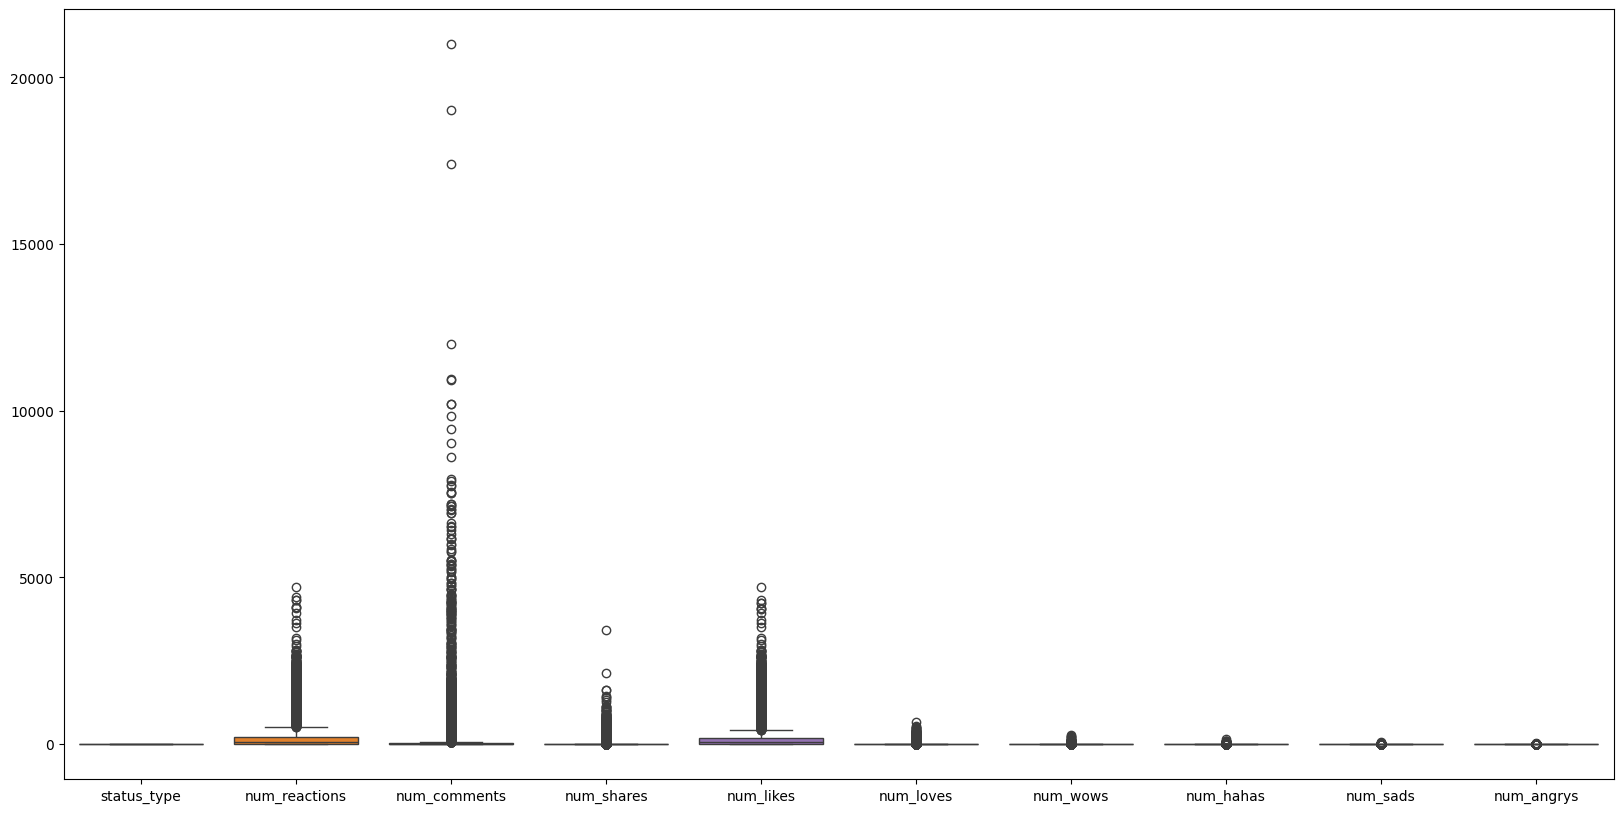

In [44]:
plt.figure(figsize=(20,10))

sns.boxplot(data)

In [47]:
from sklearn.preprocessing import StandardScaler

X = data[['status_type','num_reactions', 'num_comments', 'num_shares',
        'num_likes', 'num_loves', 'num_wows',
        'num_hahas', 'num_sads', 'num_angrys']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [52]:
from sklearn.metrics import silhouette_score

silhout_coeff=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_scaled)
  score=silhouette_score(X_scaled,kmeans.labels_)
  silhout_coeff.append(score)

Text(0.5, 1.0, 'Silhouette Coefficient Analysis')

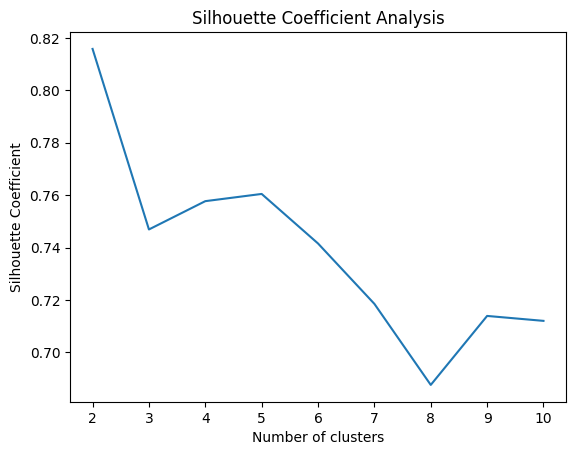

In [53]:
plt.plot(range(2,11),silhout_coeff)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Analysis')

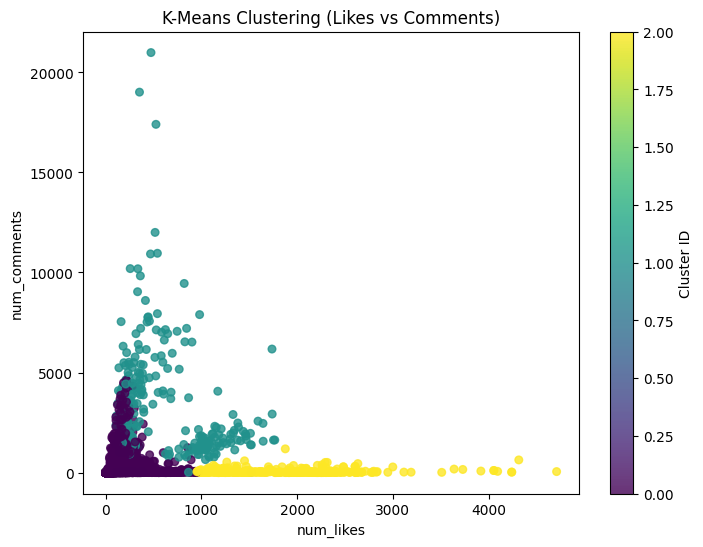

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(data['num_likes'], data['num_comments'],
            c=data['cluster'], cmap='viridis', s=30, alpha=0.8)
plt.xlabel('num_likes')
plt.ylabel('num_comments')
plt.title('K-Means Clustering (Likes vs Comments)')
plt.colorbar(label='Cluster ID')
plt.show()


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [56]:
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0,0
7047,1,2,0,0,1,1,0,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0,0


## Hence there are 2 clusters iin our dataset